# Quantum Computing Workshop 02

---

## Table of Contents
1. Introduction to Quantum Computing
2. Representing Qubit States
3. Classical vs Quantum Bits
4. Exploring Qubits with Qiskit
5. The Rules of Measurement
6. The Bloch Sphere
7. Single Qubit Gates

# 1. Introduction to Quantum Computing

## What is Quantum Computing?

Quantum Computing is the area of study focused on developing computing methods based on the principle of quantum theory. Quantum Physics explains the nature and behaviour of energy and matter on the quantum (atomic and subatomic) scale.

Elementary particles such as protons, neutrons and electrons can exist in two or more states at a time. This fundamental behaviour is utilized in designing quantum computation processing units.

**Key Points:**
- Quantum computing uses a combination of bits of 1's, 0's and both 1 and 0 at a time
- Information is encoded in quantum systems such as atoms, ions or quantum dots
- Provides computational tasks with greater efficiency than classical computing

## Moore's Law & Its End

In 1965, Gordon E. Moore—co-founder of Intel—postulated that **"the number of transistors in an IC chip doubles about every eighteen months"**. This became known as Moore's Law.

### Current Limitations:
- Present limit: approximately 10⁸ transistors per chip
- Circuit components size: ~100 nanometers (atomic scale)
- At this scale, quantum effects become unavoidably dominant
- Need for alternative computing methods

**Solution:** Quantum computers based on quantum bits (qubits) use quantum effects like superposition and entanglement to overcome classical computing problems.

## Differences Between Classical and Quantum Computing

| Key Points | Classical Computing | Quantum Computing |
|------------|---------------------|-------------------|
| **Basis of computing** | Large scale multipurpose computer based on classical physics | High speed computer based on quantum mechanics |
| **Information storage** | Bit-based information storage using voltage/charge | Quantum bit-based information storage using electron spin or polarization |
| **Bit values** | Bits having a value of either 0 or 1, single value at any instant | Qubits have a value of 0, 1 or linear combination of both (superposition) |
| **Number of possible states** | 2 states (either 0 or 1) | Infinite states (combinations of 0 or 1 with complex information) |
| **Output** | Deterministic (same input → same output) | Probabilistic (superposed states → probabilistic answer) |
| **Gates used** | Logic gates (AND, OR, NOT, etc.) | Quantum gates (X, Y, Z, H, CNOT etc.) |
| **Operations** | Boolean Algebra | Linear algebra with unitary matrices |
| **Circuit implementation** | Macroscopic technologies | Microscopic technologies |
| **Data processing** | Sequential order | Parallel instances with quantum logic |

# 2. Concept of Bit and Qubit

## Classical Bit

A digital computer stores and processes information using **bits** which can be either **0** or **1**.

**Physical representation:**
- Anything with two distinct configurations
- One represented by "0", the other by "1"
- In modern computing: absence (0) or presence (1) of electrical signal

## Quantum Bit (Qubit)

**Qubit** is the physical carrier of quantum information. It is the quantum version of a bit.

### Dirac Notation
- **|⟩** notation is known as **'ket'** notation
- **⟨|** notation is known as **'bra'** notation
- Together called **Dirac notations**

### Mathematical Representation

'Ket' are analogous to column vectors (basis vectors):

```
|0⟩ = [1]      |1⟩ = [0]
      [0]            [1]
```

### Key Properties of Qubits

1. **Superposition:** Qubit can be in any one of the two states |0⟩, |1⟩ OR in a superposed state simultaneously
2. **General form:** |ψ⟩ = α|0⟩ + β|1⟩
3. **Normalization:** |α|² + |β|² = 1
4. **Measurement:** Collapses to either |0⟩ or |1⟩ probabilistically
   - Probability of measuring |0⟩: |α|²
   - Probability of measuring |1⟩: |β|²

### Physical Implementation Examples

**Electron Spin:**
- Spin up → |1⟩
- Spin down → |0⟩

**Energy Levels:**
- Ground state → |0⟩
- Excited state → |1⟩

### Example: Superposition State

```
|ψ⟩ = (1/√2)|0⟩ + (1/√2)|1⟩

Where: α = 1/√2, β = 1/√2
Therefore: |α|² = |β|² = 1/2
```

This means 50% probability of measuring |0⟩ and 50% probability of measuring |1⟩.

# 3. Exploring Qubits with Qiskit

## Setup and Imports

First, import all necessary tools (Updated for Qiskit 1.0+):

In [1]:
%matplotlib inline

# Import required libraries (Updated for Qiskit 1.0+)
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi
import matplotlib.pyplot as plt

# Create simulator
sim = AerSimulator()



## Creating Quantum Circuits

In Qiskit, we use the `QuantumCircuit` object to store circuits:

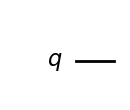

In [2]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Visualize the circuit
fig = qc.draw('mpl')
plt.show()


## Initializing Qubit States

Qubits always start in state |0⟩. We can use `initialize()` to transform to any state:

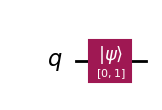

In [3]:
# Initialize to |1⟩ state
qc = QuantumCircuit(1)
initial_state = [0, 1]  # |1⟩ state
qc.initialize(initial_state, 0)

# Visualize the circuit
fig = qc.draw('mpl')
plt.show()


## Getting the Statevector

To view the quantum state without measurement:

In [4]:
# Create circuit
qc = QuantumCircuit(1)
initial_state = [0, 1]  # |1⟩
qc.initialize(initial_state, 0)
qc.save_statevector()  # Tell simulator to save statevector

# Transpile and run
qc_transpiled = transpile(qc, sim)
job = sim.run(qc_transpiled)
result = job.result()

# Get statevector
out_state = result.get_statevector()
print("Output state:", out_state)
print("\nThis represents the |1⟩ state: [0, 1]")

Output state: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))

This represents the |1⟩ state: [0, 1]


**Note:** Python uses `j` to represent *i* in complex numbers. `0.+0.j` = 0, and `1.+0.j` = 1.

## Measuring Qubits

Add measurement to see classical outcomes:

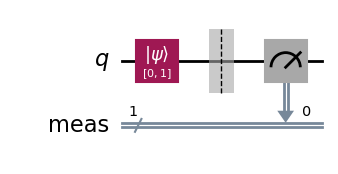

Measurement counts: {'1': 1024}


In [5]:
# Create and measure
qc = QuantumCircuit(1)
initial_state = [0, 1]
qc.initialize(initial_state, 0)
qc.measure_all()

# Draw circuit
fig = qc.draw('mpl')
plt.show()

# Run simulation
qc_transpiled = transpile(qc, sim)
job = sim.run(qc_transpiled, shots=1024)
result = job.result()
counts = result.get_counts()

# Display results
print("Measurement counts:", counts)

We see 100% chance of measuring |1⟩ as expected!

## Creating Superposition States

Let's create the superposition state: |ψ⟩ = (1/√2)|0⟩ + (i/√2)|1⟩

Statevector: Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))
This is approximately: [0.707+0j, 0+0.707j]
Which equals: (1/√2)|0⟩ + (i/√2)|1⟩


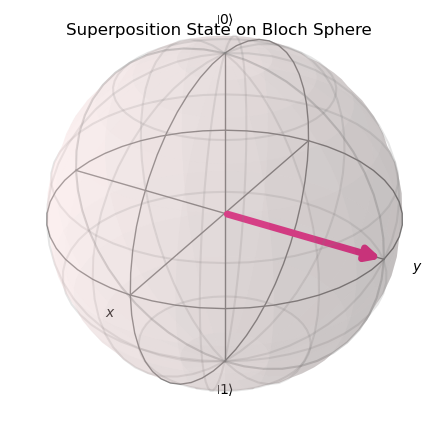

In [6]:
# Define superposition state
initial_state = [1/sqrt(2), 1j/sqrt(2)]

# Create circuit (without measurement to see statevector)
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
qc.save_statevector()

# Run and get statevector
qc_transpiled = transpile(qc, sim)
result = sim.run(qc_transpiled).result()
state = result.get_statevector()

print("Statevector:", state)
print("This is approximately: [0.707+0j, 0+0.707j]")
print("Which equals: (1/√2)|0⟩ + (i/√2)|1⟩")

# Visualize on Bloch sphere
fig = plot_bloch_multivector(state)
plt.title("Superposition State on Bloch Sphere")
plt.show()
plt.show()

## Measuring Superposition

Now let's measure this superposition:

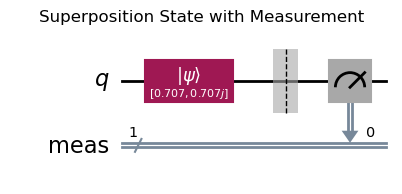

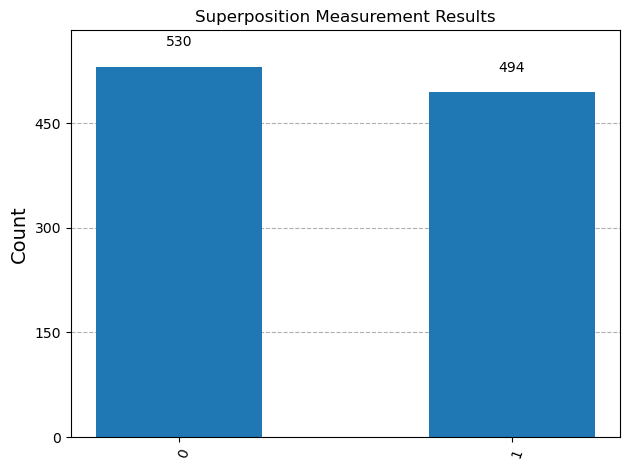

Counts: {'0': 530, '1': 494}

Notice: We see approximately equal probability (~50%) of measuring |0⟩ and |1⟩!


In [7]:
# Create circuit with measurement
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc.initialize(initial_state, 0)
qc.measure_all()

# Draw circuit
fig = qc.draw('mpl')
plt.title("Superposition State with Measurement")
plt.show()
plt.show()

# Run simulation
qc_transpiled = transpile(qc, sim)
job = sim.run(qc_transpiled, shots=1024)
counts = job.result().get_counts()

# Display results
plot_histogram(counts, title="Superposition Measurement Results")
plt.show()

print("Counts:", counts)
print("\nNotice: We see approximately equal probability (~50%) of measuring |0⟩ and |1⟩!")

# 4. The Rules of Measurement

## The Fundamental Measurement Rule

To find the probability of measuring state |x⟩ in state |ψ⟩:

**P(x) = |⟨x|ψ⟩|²**

Where:
- |ψ⟩ is a ket (column vector)
- ⟨x| is a bra (row vector)
- ⟨x|ψ⟩ is the inner product

### Example Calculation

For state |ψ⟩ = (1/√2)|0⟩ + (1/√2)|1⟩:

**Probability of measuring |0⟩:**
```
⟨0|ψ⟩ = [1 0] [1/√2] = 1/√2
              [1/√2]

P(0) = |⟨0|ψ⟩|² = |1/√2|² = 1/2 = 50%
```

**Probability of measuring |1⟩:**
```
⟨1|ψ⟩ = [0 1] [1/√2] = 1/√2
              [1/√2]

P(1) = |⟨1|ψ⟩|² = |1/√2|² = 1/2 = 50%
```

## Implications of Measurement Rules

### 1. Normalization

Probabilities must sum to 1, so the statevector must be normalized:

**|α|² + |β|² = 1**

The magnitude of the state vector equals 1.

### 2. Observer Effect (State Collapse)

**Before measurement:** |ψ⟩ = α|0⟩ + β|1⟩ (superposition)

**After measuring |0⟩:** |ψ⟩ → |0⟩ (collapsed)

**Repeated measurement:** Will always give |0⟩

The act of measuring **changes** the state of the qubit!

### Demonstration of State Collapse

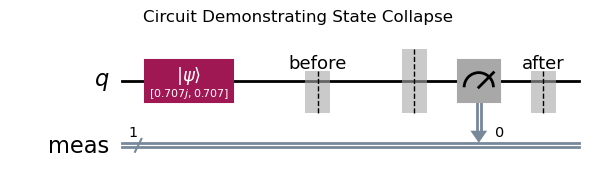

Before measurement: Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))
After measurement: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))

Notice: After measurement, the qubit has collapsed to either |0⟩ or |1⟩!
Run this cell multiple times to see different collapse outcomes.


In [8]:
# Initialize in superposition
qc = QuantumCircuit(1)
initial_state = [1j/sqrt(2), 1/sqrt(2)]
qc.initialize(initial_state, 0)
qc.save_statevector(label='before')

# Measure
qc.measure_all()
qc.save_statevector(label='after')

# Draw circuit
fig = qc.draw('mpl')
plt.title("Circuit Demonstrating State Collapse")
plt.show()
plt.show()

# Run simulation
qc_transpiled = transpile(qc, sim)
result = sim.run(qc_transpiled).result()

# Get states
before = result.data()['before']
after = result.data()['after']

print("Before measurement:", before)
print("After measurement:", after)
print("\nNotice: After measurement, the qubit has collapsed to either |0⟩ or |1⟩!")
print("Run this cell multiple times to see different collapse outcomes.")

### 3. Global Phase

States that differ only by a global phase are physically indistinguishable:

|ψ⟩ and e^(iφ)|ψ⟩ are **equivalent**

Examples:
- |0⟩ and -|0⟩ are the same state
- |1⟩ and i|1⟩ are the same state

# 5. The Bloch Sphere

## General Qubit State

Any qubit state can be written as:

**|ψ⟩ = cos(θ/2)|0⟩ + e^(iφ)sin(θ/2)|1⟩**

Where:
- 0 ≤ θ ≤ π
- 0 ≤ φ < 2π

## Bloch Sphere Representation

The **Bloch sphere** is an imaginary unit sphere used to represent pure single-qubit states.

**Key Points:**
- North Pole: |0⟩ state
- South Pole: |1⟩ state
- Surface points: All other qubit states
- θ: angle from z-axis
- φ: azimuthal angle from x-axis

### Special Points on Bloch Sphere

**Case 1:** θ = 0, φ = 0 → |ψ⟩ = |0⟩ (North Pole)

**Case 2:** θ = π, φ = 0 → |ψ⟩ = |1⟩ (South Pole)

**Case 3:** θ = π/2, φ = 0 → |ψ⟩ = (1/√2)|0⟩ + (1/√2)|1⟩ = |+⟩ (X-axis)

**Case 4:** θ = π/2, φ = π → |ψ⟩ = (1/√2)|0⟩ - (1/√2)|1⟩ = |-⟩ (Negative X-axis)

# 6. Single Qubit Gates

## Introduction to Quantum Gates

**Quantum gates** are operations that transform qubit states. They are:
- Represented by unitary matrices
- Reversible operations
- Building blocks of quantum algorithms

Between initialization and measurement, all operations are **reversible**!

## 6.1 Pauli Gates

### The X-Gate (NOT Gate)

**Matrix representation:**
```
X = [0 1]
    [1 0]
```

**Effect:** Flips |0⟩ ↔ |1⟩ (bit-flip)

**Action:**
- X|0⟩ = |1⟩
- X|1⟩ = |0⟩
- X(α|0⟩ + β|1⟩) = α|1⟩ + β|0⟩

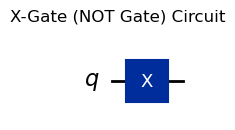

State after X-gate: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
Starting from |0⟩, X-gate produces |1⟩


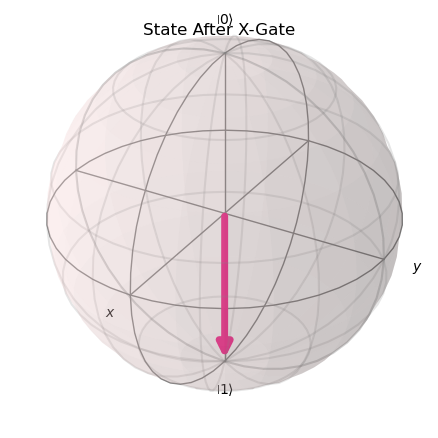

In [10]:
# X-Gate Example
qc = QuantumCircuit(1)
qc.x(0)  # Apply X-gate to qubit 0

# Draw circuit
fig = qc.draw('mpl')
plt.title("X-Gate (NOT Gate) Circuit")
plt.show()
plt.show()

# Verify result
qc.save_statevector()
qc_transpiled = transpile(qc, sim)
state = sim.run(qc_transpiled).result().get_statevector()

print("State after X-gate:", state)
print("Starting from |0⟩, X-gate produces |1⟩")

# Visualize on Bloch sphere
fig = plot_bloch_multivector(state)
plt.title("State After X-Gate")
plt.show()
plt.show()

### The Y-Gate

**Matrix representation:**
```
Y = [0 -i]
    [i  0]
```

**Effect:** Combined bit-flip and phase-flip

**Action:**
- Y|0⟩ = i|1⟩
- Y|1⟩ = -i|0⟩

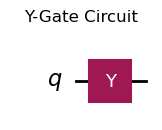

State after Y-gate: Statevector([0.-0.j, 0.+1.j],
            dims=(2,))


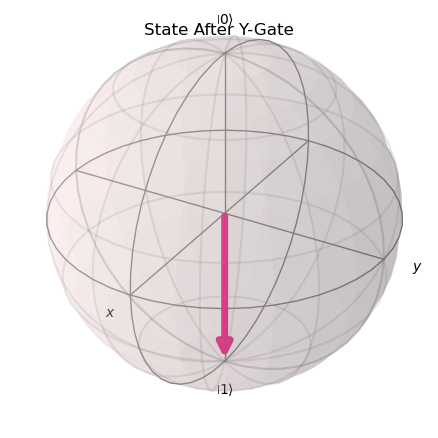

In [11]:
# Y-Gate Example
qc = QuantumCircuit(1)
qc.y(0)  # Apply Y-gate to qubit 0

fig = qc.draw('mpl')
plt.title("Y-Gate Circuit")
plt.show()
plt.show()

# Get state
qc.save_statevector()
qc_transpiled = transpile(qc, sim)
state = sim.run(qc_transpiled).result().get_statevector()

print("State after Y-gate:", state)

fig = plot_bloch_multivector(state)
plt.title("State After Y-Gate")
plt.show()
plt.show()

### The Z-Gate (Phase-Flip)

**Matrix representation:**
```
Z = [1  0]
    [0 -1]
```

**Effect:** Phase-flip (changes sign of |1⟩)

**Action:**
- Z|0⟩ = |0⟩
- Z|1⟩ = -|1⟩
- Z(α|0⟩ + β|1⟩) = α|0⟩ - β|1⟩

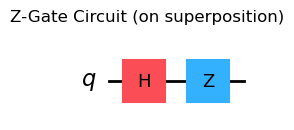

State after H then Z: Statevector([ 0.70710678+0.00000000e+00j, -0.70710678-8.65956056e-17j],
            dims=(2,))


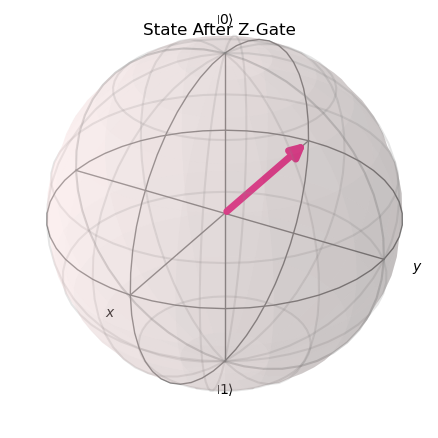

In [12]:
# Z-Gate Example
# First create superposition, then apply Z
qc = QuantumCircuit(1)
qc.h(0)  # Create superposition
qc.z(0)  # Apply Z-gate

fig = qc.draw('mpl')
plt.title("Z-Gate Circuit (on superposition)")
plt.show()
plt.show()

qc.save_statevector()
qc_transpiled = transpile(qc, sim)
state = sim.run(qc_transpiled).result().get_statevector()

print("State after H then Z:", state)

fig = plot_bloch_multivector(state)
plt.title("State After Z-Gate")
plt.show()
plt.show()

## 6.2 The Hadamard Gate (H-Gate)

**Most important quantum gate!**

**Matrix representation:**
```
H = (1/√2) [1  1]
           [1 -1]
```

**Effect:** Creates superposition

**Action:**
- H|0⟩ = (1/√2)(|0⟩ + |1⟩) = |+⟩
- H|1⟩ = (1/√2)(|0⟩ - |1⟩) = |-⟩
- H|+⟩ = |0⟩
- H|-⟩ = |1⟩

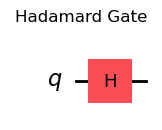

State after H-gate: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
This is the |+⟩ state: (1/√2)|0⟩ + (1/√2)|1⟩


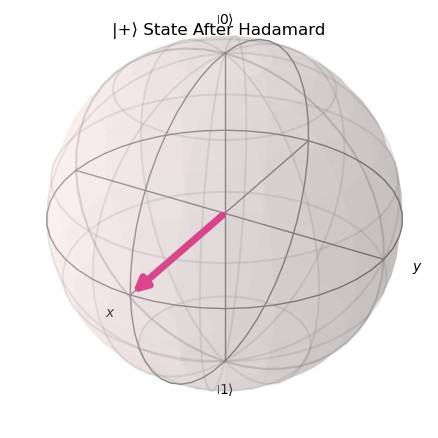

In [13]:
# Hadamard Gate Example
qc = QuantumCircuit(1)
qc.h(0)  # Apply H-gate to qubit 0

fig = qc.draw('mpl')
plt.title("Hadamard Gate")
plt.show()
plt.show()

# See result
qc.save_statevector()
qc_transpiled = transpile(qc, sim)
state = sim.run(qc_transpiled).result().get_statevector()

print("State after H-gate:", state)
print("This is the |+⟩ state: (1/√2)|0⟩ + (1/√2)|1⟩")

fig = plot_bloch_multivector(state)
plt.title("|+⟩ State After Hadamard")
plt.show()
plt.show()

### Measuring Hadamard Output

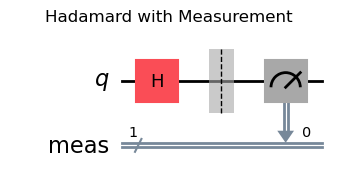

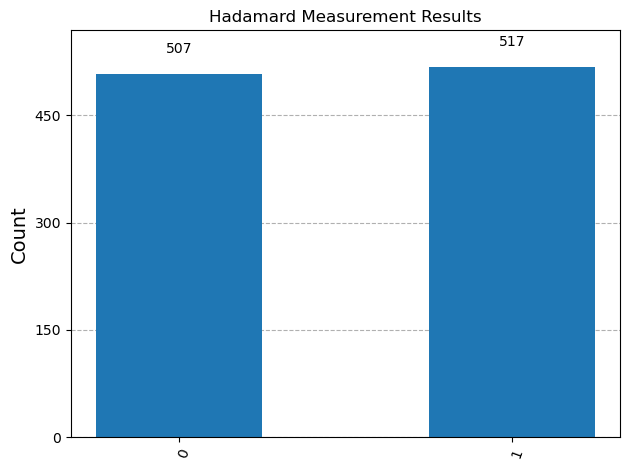

Counts: {'0': 507, '1': 517}
Equal probability of 0 and 1!


In [14]:
# Apply H-gate and measure
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()

fig = qc.draw('mpl')
plt.title("Hadamard with Measurement")
plt.show()
plt.show()

# Run simulation
qc_transpiled = transpile(qc, sim)
counts = sim.run(qc_transpiled, shots=1024).result().get_counts()

plot_histogram(counts, title="Hadamard Measurement Results")
plt.show()

print("Counts:", counts)
print("Equal probability of 0 and 1!")

## 6.3 The Phase Gate (P-Gate)

**Parametrized gate:** Requires angle φ

**Matrix representation:**
```
P(φ) = [1    0   ]
       [0  e^(iφ)]
```

**Effect:** Adds phase e^(iφ) to |1⟩ component

**Action:**
- P(φ)|0⟩ = |0⟩
- P(φ)|1⟩ = e^(iφ)|1⟩

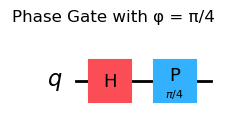

State after H then P(π/4): Statevector([0.70710678+0.j , 0.5       +0.5j],
            dims=(2,))


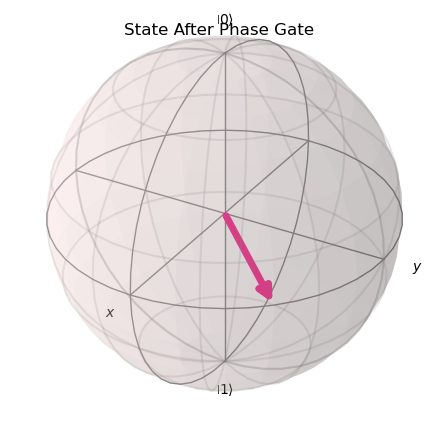

In [15]:
# Phase Gate Example
qc = QuantumCircuit(1)
qc.h(0)  # Create superposition first
qc.p(pi/4, 0)  # Apply P-gate with φ = π/4

fig = qc.draw('mpl')
plt.title("Phase Gate with φ = π/4")
plt.show()
plt.show()

qc.save_statevector()
qc_transpiled = transpile(qc, sim)
state = sim.run(qc_transpiled).result().get_statevector()

print("State after H then P(π/4):", state)

fig = plot_bloch_multivector(state)
plt.title("State After Phase Gate")
plt.show()
plt.show()

## 6.4 Special Phase Gates

### Identity Gate (I)

**Matrix:**
```
I = [1 0]
    [0 1]
```

**Effect:** Does nothing (useful for calculations)

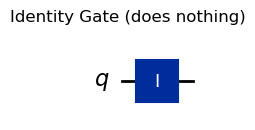

In [16]:
# Identity Gate
qc = QuantumCircuit(1)
qc.id(0)  # Apply I-gate

fig = qc.draw('mpl')
plt.title("Identity Gate (does nothing)")
plt.show()
plt.show()

### S-Gate (√Z Gate)

**Matrix:**
```
S = [1  0]
    [0  i]
```

**Special case:** P(π/2)

**Properties:**
- S² = Z (two S-gates = one Z-gate)
- S† (S-dagger) is the inverse

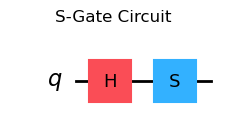

State after H then S: Statevector([7.07106781e-01+0.j        , 4.32978028e-17+0.70710678j],
            dims=(2,))


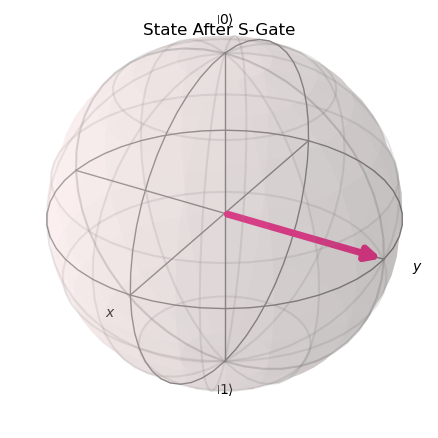

In [17]:
# S-Gate Example
qc = QuantumCircuit(1)
qc.h(0)     # Create superposition
qc.s(0)     # Apply S-gate

fig = qc.draw('mpl')
plt.title("S-Gate Circuit")
plt.show()
plt.show()

qc.save_statevector()
qc_transpiled = transpile(qc, sim)
state = sim.run(qc_transpiled).result().get_statevector()

print("State after H then S:", state)

fig = plot_bloch_multivector(state)
plt.title("State After S-Gate")
plt.show()
plt.show()

### Verify S² = Z

In [18]:
# Verify that two S-gates equal one Z-gate
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.z(0)
qc1.save_statevector()

qc2 = QuantumCircuit(1)
qc2.h(0)
qc2.s(0)
qc2.s(0)  # Two S-gates
qc2.save_statevector()

state1 = sim.run(transpile(qc1, sim)).result().get_statevector()
state2 = sim.run(transpile(qc2, sim)).result().get_statevector()

print("After Z:", state1)
print("After SS:", state2)
print("\nAre they equal?", all(abs(state1[i] - state2[i]) < 1e-10 for i in range(len(state1))))

After Z: Statevector([ 0.70710678+0.00000000e+00j, -0.70710678-8.65956056e-17j],
            dims=(2,))
After SS: Statevector([ 0.70710678+0.00000000e+00j, -0.70710678-8.65956056e-17j],
            dims=(2,))

Are they equal? True


C:\Users\Nyx\AppData\Local\Temp\ipykernel_30008\529007301.py:18: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  print("\nAre they equal?", all(abs(state1[i] - state2[i]) < 1e-10 for i in range(len(state1))))


### T-Gate (π/8 Gate)

**Matrix:**
```
T = [1      0     ]
    [0  e^(iπ/4)]
```

**Special case:** P(π/4)

**Properties:**
- T² = S
- T⁴ = Z
- Very important for quantum algorithms!

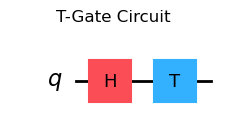

State after H then T: Statevector([0.70710678+0.j , 0.5       +0.5j],
            dims=(2,))


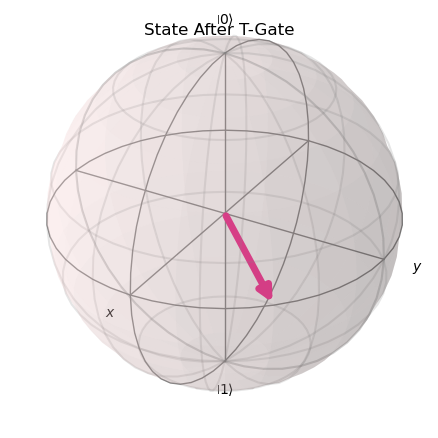

In [19]:
# T-Gate Example
qc = QuantumCircuit(1)
qc.h(0)     # Create superposition
qc.t(0)     # Apply T-gate

fig = qc.draw('mpl')
plt.title("T-Gate Circuit")
plt.show()
plt.show()

qc.save_statevector()
qc_transpiled = transpile(qc, sim)
state = sim.run(qc_transpiled).result().get_statevector()

print("State after H then T:", state)

fig = plot_bloch_multivector(state)
plt.title("State After T-Gate")
plt.show()
plt.show()

## 6.5 The Universal U-Gate

**Most general single-qubit gate:**

**Matrix:**
```
U(θ,φ,λ) = [cos(θ/2)        -e^(iλ)sin(θ/2)    ]
           [e^(iφ)sin(θ/2)   e^(i(φ+λ))cos(θ/2)]
```

**All single-qubit gates** can be expressed as U(θ,φ,λ)!

**Examples:**
- H = U(π/2, 0, π)
- X = U(π, 0, π)
- Y = U(π, π/2, π/2)
- Z = U(0, 0, π)

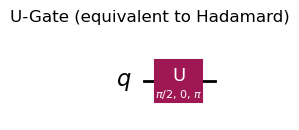

State after U(π/2, 0, π): Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
This should equal H|0⟩ = |+⟩


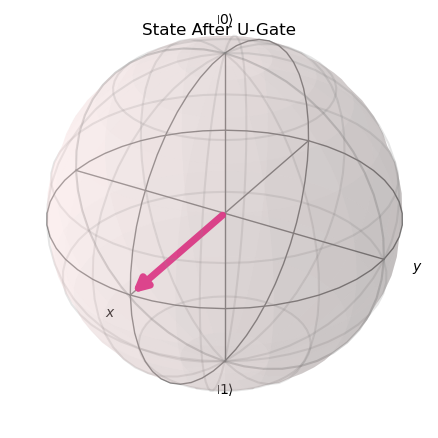

In [20]:
# U-Gate Example - Create Hadamard using U-gate
qc = QuantumCircuit(1)
qc.u(pi/2, 0, pi, 0)  # Equivalent to H-gate

fig = qc.draw('mpl')
plt.title("U-Gate (equivalent to Hadamard)")
plt.show()
plt.show()

qc.save_statevector()
qc_transpiled = transpile(qc, sim)
state = sim.run(qc_transpiled).result().get_statevector()

print("State after U(π/2, 0, π):", state)
print("This should equal H|0⟩ = |+⟩")

fig = plot_bloch_multivector(state)
plt.title("State After U-Gate")
plt.show()
plt.show()

## Complete Example: Gate Combinations

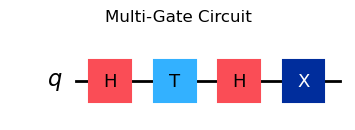

Final state: Statevector([0.14644661-0.35355339j, 0.85355339+0.35355339j],
            dims=(2,))


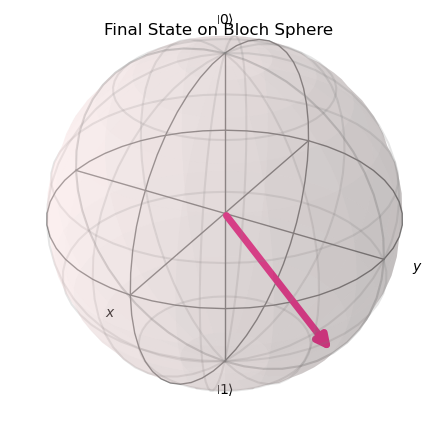

In [21]:
# Create a circuit with multiple gates
qc = QuantumCircuit(1)

# Start with |0⟩
qc.h(0)    # Create superposition: |+⟩
qc.t(0)    # Add phase
qc.h(0)    # Transform back
qc.x(0)    # Flip

# Visualize
qc.draw('mpl', style='iqp')
plt.title("Multi-Gate Circuit")
plt.show()

# Get final state
qc.save_statevector()
qc_transpiled = transpile(qc, sim)
result = sim.run(qc_transpiled).result()
final_state = result.get_statevector()

print("Final state:", final_state)

fig = plot_bloch_multivector(final_state)
plt.title("Final State on Bloch Sphere")
plt.show()
plt.show()

## Gate Summary Table

| Gate | Matrix | Effect | Rotation |
|------|--------|--------|----------|
| **I** | [[1,0],[0,1]] | Identity | None |
| **X** | [[0,1],[1,0]] | Bit-flip | π around x |
| **Y** | [[0,-i],[i,0]] | Bit+phase flip | π around y |
| **Z** | [[1,0],[0,-1]] | Phase-flip | π around z |
| **H** | (1/√2)[[1,1],[1,-1]] | Superposition | Around [1,0,1] |
| **S** | [[1,0],[0,i]] | π/2 phase | π/2 around z |
| **T** | [[1,0],[0,e^(iπ/4)]] | π/4 phase | π/4 around z |
| **P(φ)** | [[1,0],[0,e^(iφ)]] | φ phase | φ around z |

## Practice Exercise 1: X-Basis Measurement

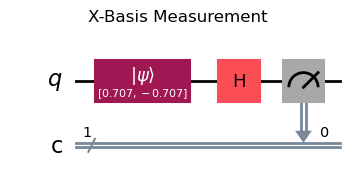

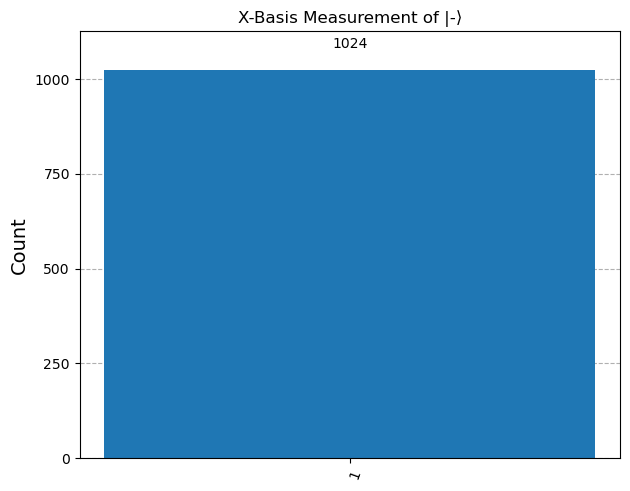

Counts: {'1': 1024}
Since |-⟩ is a basis state in X-basis, we should get 100% |1⟩


In [22]:
# Create a function to measure in the X-basis using H-gates
def x_measurement(qc, qubit, cbit):
    """Measure qubit in X-basis"""
    qc.h(qubit)  # Transform from X to Z basis
    qc.measure(qubit, cbit)
    return qc

# Test it
qc = QuantumCircuit(1, 1)
initial_state = [1/sqrt(2), -1/sqrt(2)]  # |-⟩ state
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)

fig = qc.draw('mpl')
plt.title("X-Basis Measurement")
plt.show()
plt.show()

# Run and see results
qc_transpiled = transpile(qc, sim)
counts = sim.run(qc_transpiled, shots=1024).result().get_counts()

plot_histogram(counts)
plt.title("X-Basis Measurement of |-⟩")
plt.show()

print("Counts:", counts)
print("Since |-⟩ is a basis state in X-basis, we should get 100% |1⟩")

## Practice Exercise 2: Gate Equivalences

Verify that HZH = X:

X gate: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
HZH:    Statevector([-6.123234e-17+7.49879891e-33j,  1.000000e+00+0.00000000e+00j],
            dims=(2,))

Are they equal? True


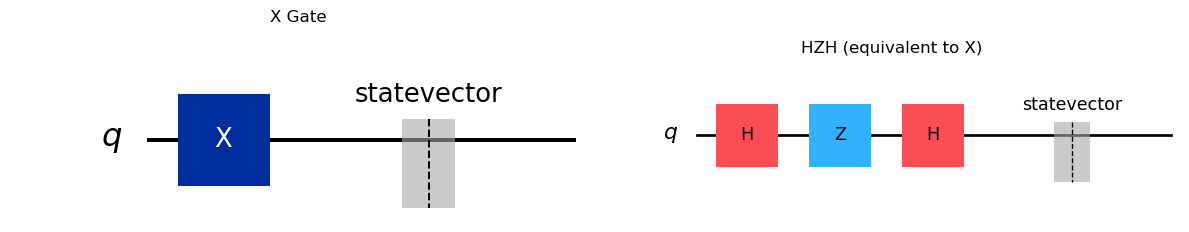

## Practice Exercise 3: Custom Rotations

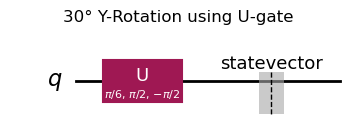

State after 30° Y-rotation: Statevector([9.65925826e-01+0.j        , 1.58480958e-17+0.25881905j],
            dims=(2,))


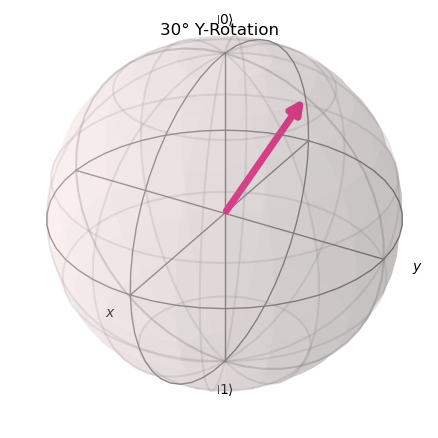

In [ ]:
# Create rotation by 30° around Y-axis using U-gate


## sooooo yeah we saw today that

1. **Quantum gates are reversible operations** represented by unitary matrices
2. **Pauli gates (X,Y,Z)** perform rotations by π around their respective axes
3. **Hadamard gate** creates superposition and switches between X and Z bases
4. **Phase gates (P,S,T)** add phase without changing basis states
5. **All single-qubit gates** can be decomposed into U(θ,φ,λ)
6. **Between initialization and measurement**, quantum operations preserve superposition

---

## Next Steps

In the next section, we'll explore:
- Multiple qubit systems
- Entanglement
- Two-qubit gates (CNOT, SWAP, etc.)
- Quantum algorithms

---

## Installation Reminder

Make sure you have the required packages:

```bash
pip install qiskit qiskit-aer matplotlib numpy
```

---

**End of Single Qubit Gates Section**